In [1]:
import torch 
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
sns.set(color_codes=True)

## Logistic Regression

### Visualize Data

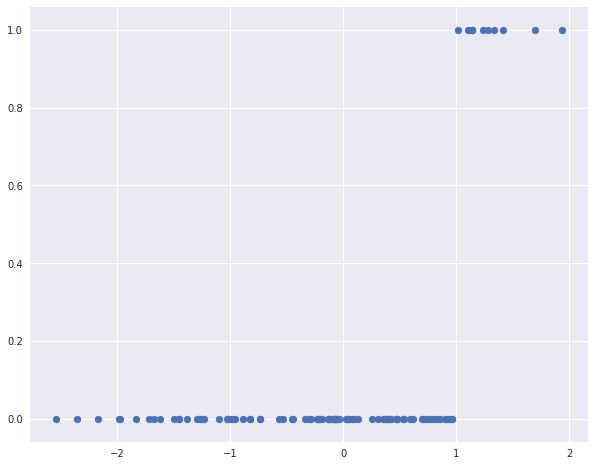

In [16]:
x = np.random.normal(size=(100))
w = np.random.randn(1)
b = np.random.randn(1)
y = (((x * w - b) > 0) * 1)
plt.scatter(x, y, c='b', marker='o', label='Real Data')

## Build Model

In [5]:
class Linear(nn.Module):
    def __init__(self, input_size, out_size):
        super(Linear, self).__init__()
        self.linear = nn.Linear(input_size, out_size)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        logits = self.linear(x)
        label = self.sigmoid(logits)
        return logits, label
model = Linear(1, 1)

In [6]:
criterion = nn.BCEWithLogitsLoss()
optim = torch.optim.SGD(model.parameters(), lr=3e-1)

In [19]:
epochs = 10000
for epoch in range(epochs):
    model.zero_grad()
    x_torch = Variable(torch.Tensor(x))
    x_torch = x_torch.view(-1, 1)
    y_torch = Variable(torch.Tensor(y* 1.))
    y_torch = y_torch.view(-1, 1)
    logits_torch, label_torch = model(x_torch)
    loss = criterion(logits_torch, y_torch)
    loss.backward()
    optim.step()
    if epoch % 1000 == 0:
        print (epoch, loss.data.numpy())

0 [ 0.84699965]
1000 [ 0.08489256]
2000 [ 0.06736347]
3000 [ 0.05854101]
4000 [ 0.05284708]
5000 [ 0.04873554]
6000 [ 0.04556708]
7000 [ 0.04301876]
8000 [ 0.04090615]
9000 [ 0.03911458]


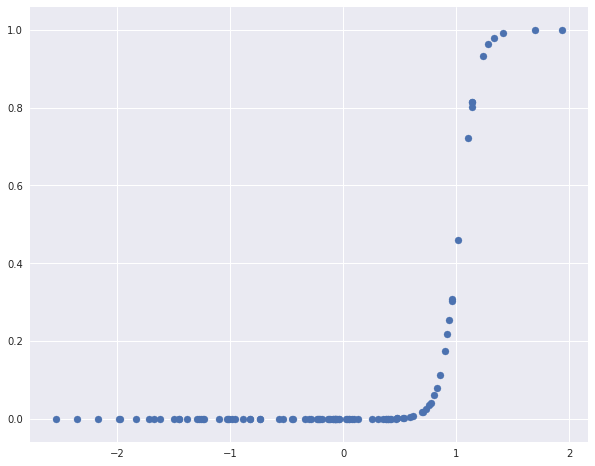

In [20]:
label = label_torch.data.numpy()
plt.scatter(x, label)